<h1 styles="font-size:3rem;color:orange;">Company of chosen and URLS of their sites</h1>


# Nike

•	Twitter: https://twitter.com/nike

•	Facebook: https://www.facebook.com/nike

•	Instagram: https://www.instagram.com/nike/

•	YouTube: https://www.youtube.com/user/nike


# Import the  librabries needed

In [39]:
!pip install wordcloud

In [40]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('porter_test')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package porter_test to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package porter_test is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load the Nike Twitter data as follows

In [41]:
data = pd.read_csv('nike.csv', encoding='latin1') 
data.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. â Sheryl Sandbe...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


# To clean the text data, we will follow the steps below

# Remove URLs

In [42]:
data['tweet_full_text'] = data['tweet_full_text'].apply(lambda x: re.sub(r'http\S+', '', x)) 
data.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. â Sheryl Sandbe...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


# Remove special characters

In [43]:
text = re.sub(r'[^\w\s]', '', 'tweet_full_text')
data.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. â Sheryl Sandbe...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


# Convert text to lower case

In [44]:
data['tweet_full_text'] = data['tweet_full_text'].apply(lambda x: x.lower()) 
data.head()


,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,done is better than perfect. â sheryl sandbe...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,shout out to the great fire department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,there are some amazingly hilarious nike ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ lucas bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"one hand, one dream: the shaquem griffin story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


# Tokenize the text data

In [45]:
data['tokens'] = data['tweet_full_text'].apply(nltk.word_tokenize)
data.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,tokens
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,done is better than perfect. â sheryl sandbe...,NaN,...,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False,"[done, is, better, than, perfect, ., â, sher..."
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,shout out to the great fire department and the...,NaN,...,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False,"[shout, out, to, the, great, fire, department,..."
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,there are some amazingly hilarious nike ad mem...,NaN,...,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True,"[there, are, some, amazingly, hilarious, nike,..."
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ lucas bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False,"[#, kapernickeffect, #, swoosh, #, justdoit, @..."
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"one hand, one dream: the shaquem griffin story...",NaN,...,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False,"[one, hand, ,, one, dream, :, the, shaquem, gr..."


# Remove stopwords

In [46]:
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stopwords_list = stopwords.words('english')
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    return filtered_tokens

data['tokens'] = data['tokens'].apply(remove_stopwords)

print(data['tokens'].sample(10))

2321    [@, kaepernick7, @, nike, 'm, south, stand, co...
2911    [would, love, see, abused, ,, oppressed, musli...
826                            [#, justdolt, #, justdoit]
1879    [example, world, chose, follow, :, '', life, g...
1078    [@, corybooker, donât, back, ,, counting, #,...
4678    [#, justdoit, serena, williams, us, open, fina...
1605    [@, realdonaldtrump, could, explain, ,, would,...
416     [maybe, rest, wake, sooner, later, ,, hey, ,, ...
2623    [find, repugnantly, fascinating, ..., blackmai...
2520    [#, nike, every, time, ., every, damn, time, ....
Name: tokens, dtype: object


# Stem and Display a sample of the stemmed data

In [47]:

from nltk.stem import PorterStemmer

def stem_tokens(tokens):
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

data['stemmed_tokens'] = data['tokens'].apply(stem_tokens)

print(data['stemmed_tokens'].sample(10))

data.head()

3474    [somewher, mansion, mark, parker, wink, grin, ...
4817    [@, nike, would, like, everyon, welcom, newest...
681     [critic, govern, love, countri, ., n't, love, ...
4815    [@, nike, wait, patient, sign, ð, #, justdo...
1960    [@, realdonaldtrump, theyâll, right, side, h...
2165                    ['s, crazi, ,, nice, #, justdoit]
4064    [respect, !, #, nikeboycott, #, nikead, #, nik...
4740          [think, mine, better, @, nike, #, justdoit]
2456    ['s, friyay, everyon, !, #, happyfriday, #, ju...
1142    [ca, n't, win, without, fight, !, !, !, #, ins...
Name: stemmed_tokens, dtype: object


,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,tokens,stemmed_tokens
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,done is better than perfect. â sheryl sandbe...,NaN,...,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False,"[done, better, perfect, ., â, sheryl, sandbe...","[done, better, perfect, ., â, sheryl, sandbe..."
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,shout out to the great fire department and the...,NaN,...,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False,"[shout, great, fire, department, tour, !, ð¨...","[shout, great, fire, depart, tour, !, ð¨âð..."
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,there are some amazingly hilarious nike ad mem...,NaN,...,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True,"[amazingly, hilarious, nike, ad, memes, happen...","[amazingli, hilari, nike, ad, meme, happen, ne..."
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ lucas bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False,"[#, kapernickeffect, #, swoosh, #, justdoit, @...","[#, kapernickeffect, #, swoosh, #, justdoit, @..."
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"one hand, one dream: the shaquem griffin story...",NaN,...,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False,"[one, hand, ,, one, dream, :, shaquem, griffin...","[one, hand, ,, one, dream, :, shaquem, griffin..."


# Lemmatize and display a sample of the lemmatized data

In [53]:
 # Lemmatize the data
import nltk
from nltk.corpus import wordnet
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(stemmed_tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    return lemmatized_tokens

data ['lemmatized_tokens'] = data ['stemmed_tokens'].apply(lemmatize_tokens)

print(data['lemmatized_tokens'].sample(10))

data.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


4310    [say, canât, ., twirl, !, congratul, @, sere...
1111    [@, sclancy79, @, nfl, @, nike, 40, million, a...
761     [@, kaepernick7, @, nike, proud, support, @, k...
932     [@, realdonaldtrump, think, lack, true, compas...
4669    [#, tbt, time, footbal, season, ., s/o, everyo...
4108    [@, jonlemir, @, pie_socialmedia, indict, !, p...
284     [@, alternet, focu, ``, wacki, '', ?, trump, t...
557     [anononomu, found, soulmat, ., guy, talk, ?, 1...
1914    [ya, 'll, need, quit, worri, nike, go, grab, p...
2639    [read, entir, letter, ., eloqu, support, #, ka...
Name: lemmatized_tokens, dtype: object


,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,tokens,stemmed_tokens,lemmatized_tokens
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,done is better than perfect. â sheryl sandbe...,NaN,...,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False,"[done, better, perfect, ., â, sheryl, sandbe...","[done, better, perfect, ., â, sheryl, sandbe...","[done, better, perfect, ., â, sheryl, sandbe..."
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,shout out to the great fire department and the...,NaN,...,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False,"[shout, great, fire, department, tour, !, ð¨...","[shout, great, fire, depart, tour, !, ð¨âð...","[shout, great, fire, depart, tour, !, ð¨âð..."
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,there are some amazingly hilarious nike ad mem...,NaN,...,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True,"[amazingly, hilarious, nike, ad, memes, happen...","[amazingli, hilari, nike, ad, meme, happen, ne...","[amazingli, hilari, nike, ad, meme, happen, ne..."
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ lucas bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,ErvGotti609,1983.0,NaN,none,NaN,NaN,False,"[#, kapernickeffect, #, swoosh, #, justdoit, @...","[#, kapernickeffect, #, swoosh, #, justdoit, @...","[#, kapernickeffect, #, swoosh, #, justdoit, @..."
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"one hand, one dream: the shaquem griffin story...",NaN,...,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False,"[one, hand, ,, one, dream, :, shaquem, griffin...","[one, hand, ,, one, dream, :, shaquem, griffin...","[one, hand, ,, one, dream, :, shaquem, griffin..."
5,NaN,NaN,Fri Sep 07 16:24:35 +0000 2018,"[17, 96]","{'hashtags': [{'text': 'JUSTDOIT', 'indices': ...",NaN,0,False,@realdonaldtrump it's time for me to stock up ...,NaN,...,tazman69,2213.0,NaN,none,NaN,NaN,False,"[@, realdonaldtrump, 's, time, stock, new, run...","[@, realdonaldtrump, 's, time, stock, new, run...","[@, realdonaldtrump, 's, time, stock, new, run..."
6,NaN,NaN,Fri Sep 07 16:24:24 +0000 2018,"[0, 89]","{'hashtags': [{'text': 'RegisterToVote', 'indi...",NaN,0,False,why won't trump protect our elections? think ...,NaN,...,MJJJusticePrjct,179968.0,NaN,regular,http://t.co/O9K5mjy0wZ,NaN,False,"[wo, n't, trump, protect, elections, ?, think,...","[wo, n't, trump, protect, elect, ?, think, ., ...","[wo, n't, trump, protect, elect, ?, think, ., ..."
7,NaN,NaN,Fri Sep 07 16:24:13 +0000 2018,"[0, 138]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...",NaN,0,False,"@nike good job on shaking the whole world, i s...",NaN,...,jaure302,2167.0,NaN,none,NaN,NaN,False,"[@, nike, good, job, shaking, whole, world, ,,...","[@, nike, good, job, shake, whole, world, ,, s...","[@, nike, good, job, shake, whole, world, ,, s..."
8,NaN,NaN,Fri Sep 07 16:24:09 +0000 2018,"[0, 143]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038099973278244864, 'id_str...",0,False,great way to meet good people...wearing your n...,NaN,...,elizmopi,12964.0,NaN,none,NaN,NaN,False,"[great, way, meet, good, people, ..., wearing,...","[great, way, meet, good, p

# Use word cloud to visualize the data from the above step

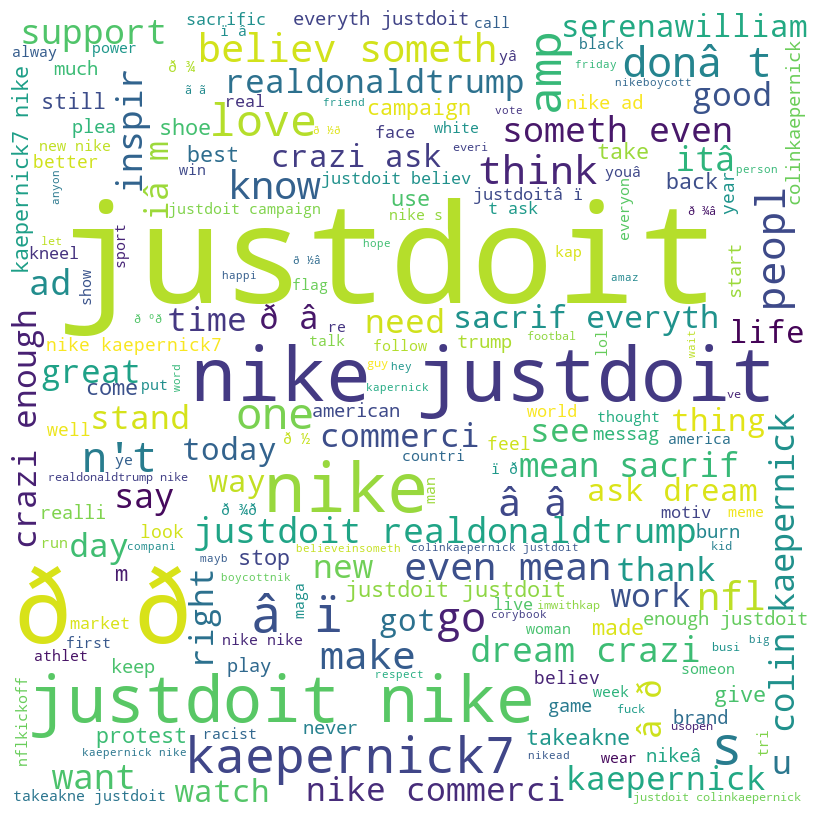

In [54]:
# Combine all lemmatized tokens into a single list
all_tokens = []
for row in data['lemmatized_tokens']:
    all_tokens += row

# Join the tokens into a single string separated by spaces
text = ' '.join(all_tokens)

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()